#WORLD BANK dirty dataset cleaning

In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
%matplotlib inline

In [137]:
#importing the WB gdp csv file

gdp=pd.read_csv("D://WB_gdp.csv")

In [138]:
gdp.head()

,Series Name,Series Code,Country Name,Country Code,2000 [YR2000],2001 [YR2001],2002 [YR2002],2003 [YR2003],2004 [YR2004],2005 [YR2005],2006 [YR2006],2007 [YR2007],2008 [YR2008],2009 [YR2009],2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015]
0,"Population, total",SP.POP.TOTL,Afghanistan,AFG,20779957,21606992,22600774,23680871,24726689,25654274,26433058,27100542,27722281,28394806,29185511,30117411,31161378,32269592,33370804,34413603
1,"Population, total",SP.POP.TOTL,Albania,ALB,3089027,3060173,3051010,3039616,3026939,3011487,2992547,2970017,2947314,2927519,2913021,2905195,2900401,2895092,2889104,2880703
2,"Population, total",SP.POP.TOTL,Algeria,DZA,31042238,31451513,31855110,32264159,32692153,33149720,33641007,34166976,34730604,35333882,35977451,36661438,37383899,38140135,38923688,39728020
3,"Population, total",SP.POP.TOTL,American Samoa,ASM,57816,58496,59077,59495,59684,59557,59109,58367,57490,56675,56084,55755,55669,55717,55791,55806
4,"Population, total",SP.POP.TOTL,Andorra,AND,65390,67344,70048,73180,76250,78871,80995,82682,83860,84461,84454,83748,82427,80770,79213,77993


In [139]:
gdp.describe()

,Series Name,Series Code,Country Name,Country Code,2000 [YR2000],2001 [YR2001],2002 [YR2002],2003 [YR2003],2004 [YR2004],2005 [YR2005],2006 [YR2006],2007 [YR2007],2008 [YR2008],2009 [YR2009],2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015]
count,11069,11067,11067,11067,11067,11067,11067,11067,11067,11067,11067,11067,11067,11067,11067,11067,11067,11067,11067,11067
unique,53,51,217,217,6730,6882,7322,7017,7116,7178,7212,7647,7279,7317,7369,7397,7751,7370,7446,7149
top,"Adolescent fertility rate (births per 1,000 wo...",DT.ODA.ODAT.PC.ZS,Burundi,ARE,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..
freq,217,217,51,51,3568,3701,3227,3414,3284,3186,3139,2725,3092,3027,2952,2947,2556,2972,2868,3161


In [140]:
gdp[gdp['Country Name']=='India']

,Series Name,Series Code,Country Name,Country Code,2000 [YR2000],2001 [YR2001],2002 [YR2002],2003 [YR2003],2004 [YR2004],2005 [YR2005],2006 [YR2006],2007 [YR2007],2008 [YR2008],2009 [YR2009],2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015]
88,"Population, total",SP.POP.TOTL,India,IND,1056575548,1075000094,1093317187,1111523146,1129623466,1147609924,1165486291,1183209471,1200669762,1217726217,1234281163,1250287939,1265780243,1280842119,1295600768,1310152392
305,Population growth (annual %),SP.POP.GROW,India,IND,1.76812551036934,1.72876856952673,1.68956166096073,1.65149126857663,1.61530829494259,1.57970914338086,1.5456964390645,1.50922198555755,1.46488991482359,1.41058271379931,1.35033831370532,1.28851296178524,1.23148489388617,1.18290421490412,1.14567340150608,1.11689591278599
522,Surface area (sq. km),AG.SRF.TOTL.K2,India,IND,3287260,3287260,3287260,3287260,3287260,3287260,3287260,3287260,3287260,3287260,3287260,3287260,3287260,3287260,3287259,3287259
739,Poverty headcount ratio at national poverty li...,SI.POV.NAHC,India,IND,..,..,..,..,37.2,..,..,..,..,29.8,..,21.9,..,..,..,..
956,"GNI, Atlas method (current US$)",NY.GNP.ATLS.CD,India,IND,467082155977.337,485442590014.32,500197978423.367,573893143638.59,687282161514.362,809085090893.324,916983754263.827,1081966703909.51,1195030840776.74,1358351431934.05,1505735408734.57,1704431329269.92,1870994302095.38,1941116422168.74,2020999036099.55,2097598587509.82
1173,"GNI per capita, Atlas method (current US$)",NY.GNP.PCAP.CD,India,IND,440,450,460,520,610,710,790,910,1000,1120,1220,1360,1480,1520,1560,1600
1390,"GNI, PPP (current international $)",NY.GNP.MKTP.PP.CD,India,IND,2190686808830.94,2351372616995.05,2484358366269.81,2727424214722.58,3023959792910.75,3364649501244.44,3743550658917.61,4153719587664.23,4357404050698.15,4735817203130.2,5173298942706.54,5568974800576.6,6080904818551.74,6396857208685.31,6700838434191.75,7076731493415.84
1607,"GNI per capita, PPP (current international $)",NY.GNP.PCAP.PP.CD,India,IND,2070,2190,2270,2450,2680,2930,3210,3510,3630,3890,4190,4450,4800,4990,5170,5400
1824,Income share held by lowest 20%,SI.DST.FRST.20,India,IND,..,..,..,..,8.5,..,..,..,..,8.3,..,8.1,..,..,..,..
2041,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,India,IND,62.505,62.907,63.304,63.699,64.095,64.5,64.918,65.35,65.794,66.244,66.693,67.13,67.545,67.931,68.286,68.607


In [141]:
gdp.dtypes

Series Name      object
Series Code      object
Country Name     object
Country Code     object
2000 [YR2000]    object
2001 [YR2001]    object
2002 [YR2002]    object
2003 [YR2003]    object
2004 [YR2004]    object
2005 [YR2005]    object
2006 [YR2006]    object
2007 [YR2007]    object
2008 [YR2008]    object
2009 [YR2009]    object
2010 [YR2010]    object
2011 [YR2011]    object
2012 [YR2012]    object
2013 [YR2013]    object
2014 [YR2014]    object
2015 [YR2015]    object
dtype: object

In [142]:
cols_to_change=gdp[['2000 [YR2000]','2001 [YR2001]','2002 [YR2002]',   '2003 [YR2003]',   '2004 [YR2004]',   '2005 [YR2005]',   '2006 [YR2006]',   '2007 [YR2007]',   '2008 [YR2008]',   '2009 [YR2009]',   '2010 [YR2010]',   '2011 [YR2011]',   '2012 [YR2012]',   '2013 [YR2013]', '2014 [YR2014]',  '2015 [YR2015]'] ]  
cols_to_change

,2000 [YR2000],2001 [YR2001],2002 [YR2002],2003 [YR2003],2004 [YR2004],2005 [YR2005],2006 [YR2006],2007 [YR2007],2008 [YR2008],2009 [YR2009],2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015]
0,20779957,21606992,22600774,23680871,24726689,25654274,26433058,27100542,27722281,28394806,29185511,30117411,31161378,32269592,33370804,34413603
1,3089027,3060173,3051010,3039616,3026939,3011487,2992547,2970017,2947314,2927519,2913021,2905195,2900401,2895092,2889104,2880703
2,31042238,31451513,31855110,32264159,32692153,33149720,33641007,34166976,34730604,35333882,35977451,36661438,37383899,38140135,38923688,39728020
3,57816,58496,59077,59495,59684,59557,59109,58367,57490,56675,56084,55755,55669,55717,55791,55806
4,65390,67344,70048,73180,76250,78871,80995,82682,83860,84461,84454,83748,82427,80770,79213,77993
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11067,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11068,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11069,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11070,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [143]:
filt=gdp.groupby(['Country Name'])
filt

In [144]:
filt.get_group('India')

,Series Name,Series Code,Country Name,Country Code,2000 [YR2000],2001 [YR2001],2002 [YR2002],2003 [YR2003],2004 [YR2004],2005 [YR2005],2006 [YR2006],2007 [YR2007],2008 [YR2008],2009 [YR2009],2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015]
88,"Population, total",SP.POP.TOTL,India,IND,1056575548,1075000094,1093317187,1111523146,1129623466,1147609924,1165486291,1183209471,1200669762,1217726217,1234281163,1250287939,1265780243,1280842119,1295600768,1310152392
305,Population growth (annual %),SP.POP.GROW,India,IND,1.76812551036934,1.72876856952673,1.68956166096073,1.65149126857663,1.61530829494259,1.57970914338086,1.5456964390645,1.50922198555755,1.46488991482359,1.41058271379931,1.35033831370532,1.28851296178524,1.23148489388617,1.18290421490412,1.14567340150608,1.11689591278599
522,Surface area (sq. km),AG.SRF.TOTL.K2,India,IND,3287260,3287260,3287260,3287260,3287260,3287260,3287260,3287260,3287260,3287260,3287260,3287260,3287260,3287260,3287259,3287259
739,Poverty headcount ratio at national poverty li...,SI.POV.NAHC,India,IND,..,..,..,..,37.2,..,..,..,..,29.8,..,21.9,..,..,..,..
956,"GNI, Atlas method (current US$)",NY.GNP.ATLS.CD,India,IND,467082155977.337,485442590014.32,500197978423.367,573893143638.59,687282161514.362,809085090893.324,916983754263.827,1081966703909.51,1195030840776.74,1358351431934.05,1505735408734.57,1704431329269.92,1870994302095.38,1941116422168.74,2020999036099.55,2097598587509.82
1173,"GNI per capita, Atlas method (current US$)",NY.GNP.PCAP.CD,India,IND,440,450,460,520,610,710,790,910,1000,1120,1220,1360,1480,1520,1560,1600
1390,"GNI, PPP (current international $)",NY.GNP.MKTP.PP.CD,India,IND,2190686808830.94,2351372616995.05,2484358366269.81,2727424214722.58,3023959792910.75,3364649501244.44,3743550658917.61,4153719587664.23,4357404050698.15,4735817203130.2,5173298942706.54,5568974800576.6,6080904818551.74,6396857208685.31,6700838434191.75,7076731493415.84
1607,"GNI per capita, PPP (current international $)",NY.GNP.PCAP.PP.CD,India,IND,2070,2190,2270,2450,2680,2930,3210,3510,3630,3890,4190,4450,4800,4990,5170,5400
1824,Income share held by lowest 20%,SI.DST.FRST.20,India,IND,..,..,..,..,8.5,..,..,..,..,8.3,..,8.1,..,..,..,..
2041,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,India,IND,62.505,62.907,63.304,63.699,64.095,64.5,64.918,65.35,65.794,66.244,66.693,67.13,67.545,67.931,68.286,68.607


In [145]:
gdp.drop(['Series Code'],inplace=True,axis=1)

In [146]:
gdp.head()

,Series Name,Country Name,Country Code,2000 [YR2000],2001 [YR2001],2002 [YR2002],2003 [YR2003],2004 [YR2004],2005 [YR2005],2006 [YR2006],2007 [YR2007],2008 [YR2008],2009 [YR2009],2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015]
0,"Population, total",Afghanistan,AFG,20779957,21606992,22600774,23680871,24726689,25654274,26433058,27100542,27722281,28394806,29185511,30117411,31161378,32269592,33370804,34413603
1,"Population, total",Albania,ALB,3089027,3060173,3051010,3039616,3026939,3011487,2992547,2970017,2947314,2927519,2913021,2905195,2900401,2895092,2889104,2880703
2,"Population, total",Algeria,DZA,31042238,31451513,31855110,32264159,32692153,33149720,33641007,34166976,34730604,35333882,35977451,36661438,37383899,38140135,38923688,39728020
3,"Population, total",American Samoa,ASM,57816,58496,59077,59495,59684,59557,59109,58367,57490,56675,56084,55755,55669,55717,55791,55806
4,"Population, total",Andorra,AND,65390,67344,70048,73180,76250,78871,80995,82682,83860,84461,84454,83748,82427,80770,79213,77993


In [147]:
gdp.isnull().sum()

Series Name      3
Country Name     5
Country Code     5
2000 [YR2000]    5
2001 [YR2001]    5
2002 [YR2002]    5
2003 [YR2003]    5
2004 [YR2004]    5
2005 [YR2005]    5
2006 [YR2006]    5
2007 [YR2007]    5
2008 [YR2008]    5
2009 [YR2009]    5
2010 [YR2010]    5
2011 [YR2011]    5
2012 [YR2012]    5
2013 [YR2013]    5
2014 [YR2014]    5
2015 [YR2015]    5
dtype: int64

In [148]:
gdp.dropna()

,Series Name,Country Name,Country Code,2000 [YR2000],2001 [YR2001],2002 [YR2002],2003 [YR2003],2004 [YR2004],2005 [YR2005],2006 [YR2006],2007 [YR2007],2008 [YR2008],2009 [YR2009],2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015]
0,"Population, total",Afghanistan,AFG,20779957,21606992,22600774,23680871,24726689,25654274,26433058,27100542,27722281,28394806,29185511,30117411,31161378,32269592,33370804,34413603
1,"Population, total",Albania,ALB,3089027,3060173,3051010,3039616,3026939,3011487,2992547,2970017,2947314,2927519,2913021,2905195,2900401,2895092,2889104,2880703
2,"Population, total",Algeria,DZA,31042238,31451513,31855110,32264159,32692153,33149720,33641007,34166976,34730604,35333882,35977451,36661438,37383899,38140135,38923688,39728020
3,"Population, total",American Samoa,ASM,57816,58496,59077,59495,59684,59557,59109,58367,57490,56675,56084,55755,55669,55717,55791,55806
4,"Population, total",Andorra,AND,65390,67344,70048,73180,76250,78871,80995,82682,83860,84461,84454,83748,82427,80770,79213,77993
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11062,"Inflation, consumer prices (annual %)",Virgin Islands (U.S.),VIR,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..
11063,"Inflation, consumer prices (annual %)",West Bank and Gaza,PSE,2.79819892435757,1.22278475878899,5.70951585976628,4.40303221730885,3.00417498638594,4.10725070715932,3.8423412562478,1.85974379351109,9.88999788691853,2.75393485083151,3.74915727597098,2.8772435849594,2.77908768282493,1.72439933626923,1.73298510037451,1.43161145810472
11064,"Inflation, consumer prices (annual %)","Yemen, Rep.",YEM,4.58999999999981,11.9115912929855,12.2385339389711,10.8323607023241,12.5150951495208,11.8112639374949,10.8447986914257,7.90511778988729,18.9762574318077,5.40776098077526,11.1748338605043,19.5435617131149,9.88538714484848,10.9684421500194,8.10472583623948,..
11065,"Inflation, consumer prices (annual %)",Zambia,ZMB,26.0304117888121,21.3937821792546,22.2333446430947,21.4015783901995,17.9677891087286,18.324439701174,9.01957247226486,10.6573496000153,12.4455793463192,13.3952546325895,8.50176133365265,6.42939681072336,6.57589970757695,6.97767605490317,7.80687553566328,10.1105928909618


In [149]:
#splitting the dataset into population
population=gdp[gdp['Series Name']=='Population, total']

In [150]:
population.head()

,Series Name,Country Name,Country Code,2000 [YR2000],2001 [YR2001],2002 [YR2002],2003 [YR2003],2004 [YR2004],2005 [YR2005],2006 [YR2006],2007 [YR2007],2008 [YR2008],2009 [YR2009],2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015]
0,"Population, total",Afghanistan,AFG,20779957,21606992,22600774,23680871,24726689,25654274,26433058,27100542,27722281,28394806,29185511,30117411,31161378,32269592,33370804,34413603
1,"Population, total",Albania,ALB,3089027,3060173,3051010,3039616,3026939,3011487,2992547,2970017,2947314,2927519,2913021,2905195,2900401,2895092,2889104,2880703
2,"Population, total",Algeria,DZA,31042238,31451513,31855110,32264159,32692153,33149720,33641007,34166976,34730604,35333882,35977451,36661438,37383899,38140135,38923688,39728020
3,"Population, total",American Samoa,ASM,57816,58496,59077,59495,59684,59557,59109,58367,57490,56675,56084,55755,55669,55717,55791,55806
4,"Population, total",Andorra,AND,65390,67344,70048,73180,76250,78871,80995,82682,83860,84461,84454,83748,82427,80770,79213,77993


In [151]:
#splitting a GNI dataset from full dataset
gni=gdp[gdp['Series Name']=='GNI, Atlas method (current US$)']

In [152]:
gni.head()

,Series Name,Country Name,Country Code,2000 [YR2000],2001 [YR2001],2002 [YR2002],2003 [YR2003],2004 [YR2004],2005 [YR2005],2006 [YR2006],2007 [YR2007],2008 [YR2008],2009 [YR2009],2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015]
868,"GNI, Atlas method (current US$)",Afghanistan,AFG,..,..,..,..,..,..,..,..,..,12652732872.4915,14872475744.9014,16077121255.9847,19583172656.8063,21249374020.7611,21141556283.2619,20583397306.3902
869,"GNI, Atlas method (current US$)",Albania,ALB,3408708296.46354,3927923955.74368,4193153284.64778,5024895333.53469,6366854113.56867,7899213432.20734,9131239744.27605,10273336546.4704,11883464800.9361,12528132732.2428,12708645464.7829,12803715190.2171,12659042748.0003,13156878985.4904,13116565123.2998,12634903056.2053
870,"GNI, Atlas method (current US$)",Algeria,DZA,49486751018.419,52417415619.2755,55118292847.171,62039831758.5645,73520106560.8985,89838119963.441,104449520206.49,122898049610.78,146432508957.613,151568168837.979,161027636302.368,168503780186.533,193251249564.427,210000589318.781,213777077095.148,192632629823.505
871,"GNI, Atlas method (current US$)",American Samoa,ASM,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..
872,"GNI, Atlas method (current US$)",Andorra,AND,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..


In [153]:
gni.isnull().sum()

Series Name      0
Country Name     0
Country Code     0
2000 [YR2000]    0
2001 [YR2001]    0
2002 [YR2002]    0
2003 [YR2003]    0
2004 [YR2004]    0
2005 [YR2005]    0
2006 [YR2006]    0
2007 [YR2007]    0
2008 [YR2008]    0
2009 [YR2009]    0
2010 [YR2010]    0
2011 [YR2011]    0
2012 [YR2012]    0
2013 [YR2013]    0
2014 [YR2014]    0
2015 [YR2015]    0
dtype: int64

In [154]:
population.isnull().sum()

Series Name      0
Country Name     0
Country Code     0
2000 [YR2000]    0
2001 [YR2001]    0
2002 [YR2002]    0
2003 [YR2003]    0
2004 [YR2004]    0
2005 [YR2005]    0
2006 [YR2006]    0
2007 [YR2007]    0
2008 [YR2008]    0
2009 [YR2009]    0
2010 [YR2010]    0
2011 [YR2011]    0
2012 [YR2012]    0
2013 [YR2013]    0
2014 [YR2014]    0
2015 [YR2015]    0
dtype: int64

In [155]:
#getting India data from the dataset
India=gdp[gdp['Country Name']=='India']

In [156]:
India.head()

,Series Name,Country Name,Country Code,2000 [YR2000],2001 [YR2001],2002 [YR2002],2003 [YR2003],2004 [YR2004],2005 [YR2005],2006 [YR2006],2007 [YR2007],2008 [YR2008],2009 [YR2009],2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015]
88,"Population, total",India,IND,1056575548,1075000094,1093317187,1111523146,1129623466,1147609924,1165486291,1183209471,1200669762,1217726217,1234281163,1250287939,1265780243,1280842119,1295600768,1310152392
305,Population growth (annual %),India,IND,1.76812551036934,1.72876856952673,1.68956166096073,1.65149126857663,1.61530829494259,1.57970914338086,1.5456964390645,1.50922198555755,1.46488991482359,1.41058271379931,1.35033831370532,1.28851296178524,1.23148489388617,1.18290421490412,1.14567340150608,1.11689591278599
522,Surface area (sq. km),India,IND,3287260,3287260,3287260,3287260,3287260,3287260,3287260,3287260,3287260,3287260,3287260,3287260,3287260,3287260,3287259,3287259
739,Poverty headcount ratio at national poverty li...,India,IND,..,..,..,..,37.2,..,..,..,..,29.8,..,21.9,..,..,..,..
956,"GNI, Atlas method (current US$)",India,IND,467082155977.337,485442590014.32,500197978423.367,573893143638.59,687282161514.362,809085090893.324,916983754263.827,1081966703909.51,1195030840776.74,1358351431934.05,1505735408734.57,1704431329269.92,1870994302095.38,1941116422168.74,2020999036099.55,2097598587509.82


In [157]:
India[India['Series Name']=='Population, total']

,Series Name,Country Name,Country Code,2000 [YR2000],2001 [YR2001],2002 [YR2002],2003 [YR2003],2004 [YR2004],2005 [YR2005],2006 [YR2006],2007 [YR2007],2008 [YR2008],2009 [YR2009],2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015]
88,"Population, total",India,IND,1056575548,1075000094,1093317187,1111523146,1129623466,1147609924,1165486291,1183209471,1200669762,1217726217,1234281163,1250287939,1265780243,1280842119,1295600768,1310152392


In [162]:
#reset the index of India dataset

India.reset_index(drop=True, inplace=True)


In [163]:
India.head()

,Series Name,Country Name,Country Code,2000 [YR2000],2001 [YR2001],2002 [YR2002],2003 [YR2003],2004 [YR2004],2005 [YR2005],2006 [YR2006],2007 [YR2007],2008 [YR2008],2009 [YR2009],2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015]
0,"Population, total",India,IND,1056575548,1075000094,1093317187,1111523146,1129623466,1147609924,1165486291,1183209471,1200669762,1217726217,1234281163,1250287939,1265780243,1280842119,1295600768,1310152392
1,Population growth (annual %),India,IND,1.76812551036934,1.72876856952673,1.68956166096073,1.65149126857663,1.61530829494259,1.57970914338086,1.5456964390645,1.50922198555755,1.46488991482359,1.41058271379931,1.35033831370532,1.28851296178524,1.23148489388617,1.18290421490412,1.14567340150608,1.11689591278599
2,Surface area (sq. km),India,IND,3287260,3287260,3287260,3287260,3287260,3287260,3287260,3287260,3287260,3287260,3287260,3287260,3287260,3287260,3287259,3287259
3,Poverty headcount ratio at national poverty li...,India,IND,..,..,..,..,37.2,..,..,..,..,29.8,..,21.9,..,..,..,..
4,"GNI, Atlas method (current US$)",India,IND,467082155977.337,485442590014.32,500197978423.367,573893143638.59,687282161514.362,809085090893.324,916983754263.827,1081966703909.51,1195030840776.74,1358351431934.05,1505735408734.57,1704431329269.92,1870994302095.38,1941116422168.74,2020999036099.55,2097598587509.82


In [168]:
#dropping the country name and country code columns
India.drop['Country Name','Country Code',inplace=True,axis=1]


,Series Name,2000 [YR2000],2001 [YR2001],2002 [YR2002],2003 [YR2003],2004 [YR2004],2005 [YR2005],2006 [YR2006],2007 [YR2007],2008 [YR2008],2009 [YR2009],2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015]
0,"Population, total",1056575548,1075000094,1093317187,1111523146,1129623466,1147609924,1165486291,1183209471,1200669762,1217726217,1234281163,1250287939,1265780243,1280842119,1295600768,1310152392
1,Population growth (annual %),1.76812551036934,1.72876856952673,1.68956166096073,1.65149126857663,1.61530829494259,1.57970914338086,1.5456964390645,1.50922198555755,1.46488991482359,1.41058271379931,1.35033831370532,1.28851296178524,1.23148489388617,1.18290421490412,1.14567340150608,1.11689591278599
2,Surface area (sq. km),3287260,3287260,3287260,3287260,3287260,3287260,3287260,3287260,3287260,3287260,3287260,3287260,3287260,3287260,3287259,3287259
3,Poverty headcount ratio at national poverty li...,..,..,..,..,37.2,..,..,..,..,29.8,..,21.9,..,..,..,..
4,"GNI, Atlas method (current US$)",467082155977.337,485442590014.32,500197978423.367,573893143638.59,687282161514.362,809085090893.324,916983754263.827,1081966703909.51,1195030840776.74,1358351431934.05,1505735408734.57,1704431329269.92,1870994302095.38,1941116422168.74,2020999036099.55,2097598587509.82


In [169]:
India_pop= India[India['Series Name']== 'Population, total']

In [170]:
India_pop.dtypes

Series Name      object
2000 [YR2000]    object
2001 [YR2001]    object
2002 [YR2002]    object
2003 [YR2003]    object
2004 [YR2004]    object
2005 [YR2005]    object
2006 [YR2006]    object
2007 [YR2007]    object
2008 [YR2008]    object
2009 [YR2009]    object
2010 [YR2010]    object
2011 [YR2011]    object
2012 [YR2012]    object
2013 [YR2013]    object
2014 [YR2014]    object
2015 [YR2015]    object
dtype: object

In [171]:
India_pop.head()

,Series Name,2000 [YR2000],2001 [YR2001],2002 [YR2002],2003 [YR2003],2004 [YR2004],2005 [YR2005],2006 [YR2006],2007 [YR2007],2008 [YR2008],2009 [YR2009],2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015]
0,"Population, total",1056575548,1075000094,1093317187,1111523146,1129623466,1147609924,1165486291,1183209471,1200669762,1217726217,1234281163,1250287939,1265780243,1280842119,1295600768,1310152392


In [172]:
# dropping the Series Name columnfrom India_pop
India_pop.drop(['Series Name'],axis=1,inplace=True)

C:\Users\Raghu\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [173]:
India_pop

,2000 [YR2000],2001 [YR2001],2002 [YR2002],2003 [YR2003],2004 [YR2004],2005 [YR2005],2006 [YR2006],2007 [YR2007],2008 [YR2008],2009 [YR2009],2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015]
0,1056575548,1075000094,1093317187,1111523146,1129623466,1147609924,1165486291,1183209471,1200669762,1217726217,1234281163,1250287939,1265780243,1280842119,1295600768,1310152392


In [180]:
#changing the datatype from object to int

India_pop=India_pop.astype(int)
India_pop.dtypes

2000 [YR2000]    int32
2001 [YR2001]    int32
2002 [YR2002]    int32
2003 [YR2003]    int32
2004 [YR2004]    int32
2005 [YR2005]    int32
2006 [YR2006]    int32
2007 [YR2007]    int32
2008 [YR2008]    int32
2009 [YR2009]    int32
2010 [YR2010]    int32
2011 [YR2011]    int32
2012 [YR2012]    int32
2013 [YR2013]    int32
2014 [YR2014]    int32
2015 [YR2015]    int32
dtype: object

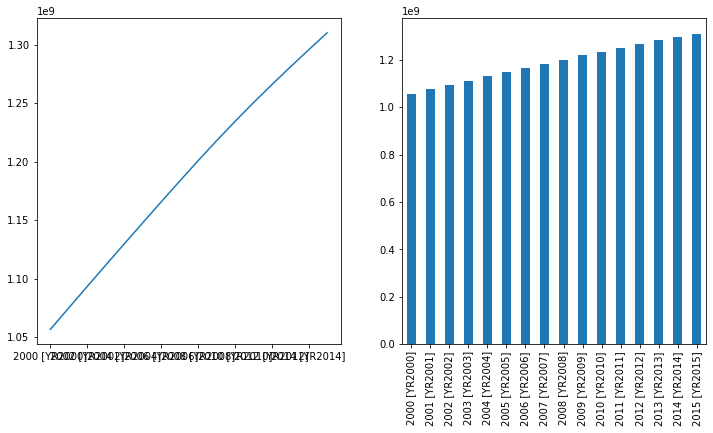

In [198]:
#plotting the entire row of population of India over the years

row=India_pop.iloc[0]
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
row.plot(kind='line')
plt.subplot(1,2,2)
row.plot(kind='bar')

In [199]:
gdp.dtypes

Series Name      object
Country Name     object
Country Code     object
2000 [YR2000]    object
2001 [YR2001]    object
2002 [YR2002]    object
2003 [YR2003]    object
2004 [YR2004]    object
2005 [YR2005]    object
2006 [YR2006]    object
2007 [YR2007]    object
2008 [YR2008]    object
2009 [YR2009]    object
2010 [YR2010]    object
2011 [YR2011]    object
2012 [YR2012]    object
2013 [YR2013]    object
2014 [YR2014]    object
2015 [YR2015]    object
dtype: object

In [203]:
cols_to_change=gdp[['2000 [YR2000]','2001 [YR2001]','2002 [YR2002]',   '2003 [YR2003]',   '2004 [YR2004]',   '2005 [YR2005]',   '2006 [YR2006]',   '2007 [YR2007]',   '2008 [YR2008]',   '2009 [YR2009]',   '2010 [YR2010]',   '2011 [YR2011]',   '2012 [YR2012]',   '2013 [YR2013]', '2014 [YR2014]',  '2015 [YR2015]'] ]  
cols_to_change.head()

,2000 [YR2000],2001 [YR2001],2002 [YR2002],2003 [YR2003],2004 [YR2004],2005 [YR2005],2006 [YR2006],2007 [YR2007],2008 [YR2008],2009 [YR2009],2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015]
0,20779957,21606992,22600774,23680871,24726689,25654274,26433058,27100542,27722281,28394806,29185511,30117411,31161378,32269592,33370804,34413603
1,3089027,3060173,3051010,3039616,3026939,3011487,2992547,2970017,2947314,2927519,2913021,2905195,2900401,2895092,2889104,2880703
2,31042238,31451513,31855110,32264159,32692153,33149720,33641007,34166976,34730604,35333882,35977451,36661438,37383899,38140135,38923688,39728020
3,57816,58496,59077,59495,59684,59557,59109,58367,57490,56675,56084,55755,55669,55717,55791,55806
4,65390,67344,70048,73180,76250,78871,80995,82682,83860,84461,84454,83748,82427,80770,79213,77993


In [206]:
cols_to_change.dtypes

2000 [YR2000]    object
2001 [YR2001]    object
2002 [YR2002]    object
2003 [YR2003]    object
2004 [YR2004]    object
2005 [YR2005]    object
2006 [YR2006]    object
2007 [YR2007]    object
2008 [YR2008]    object
2009 [YR2009]    object
2010 [YR2010]    object
2011 [YR2011]    object
2012 [YR2012]    object
2013 [YR2013]    object
2014 [YR2014]    object
2015 [YR2015]    object
dtype: object

In [211]:
#removing all the null values to avoid error during conversion of dataatype from object to int
cols_to_change.isnull().sum()

2000 [YR2000]    5
2001 [YR2001]    5
2002 [YR2002]    5
2003 [YR2003]    5
2004 [YR2004]    5
2005 [YR2005]    5
2006 [YR2006]    5
2007 [YR2007]    5
2008 [YR2008]    5
2009 [YR2009]    5
2010 [YR2010]    5
2011 [YR2011]    5
2012 [YR2012]    5
2013 [YR2013]    5
2014 [YR2014]    5
2015 [YR2015]    5
dtype: int64

In [212]:
cols_to_change.dropna(inplace=True)

C:\Users\Raghu\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [216]:
cols_to_change.isnull().sum()

2000 [YR2000]    0
2001 [YR2001]    0
2002 [YR2002]    0
2003 [YR2003]    0
2004 [YR2004]    0
2005 [YR2005]    0
2006 [YR2006]    0
2007 [YR2007]    0
2008 [YR2008]    0
2009 [YR2009]    0
2010 [YR2010]    0
2011 [YR2011]    0
2012 [YR2012]    0
2013 [YR2013]    0
2014 [YR2014]    0
2015 [YR2015]    0
dtype: int64

In [219]:
#changing the datatype to numeric
cols_to_change=cols_to_change.apply(pd.to_numeric,errors='coerce')

In [220]:
cols_to_change.dtypes

2000 [YR2000]    float64
2001 [YR2001]    float64
2002 [YR2002]    float64
2003 [YR2003]    float64
2004 [YR2004]    float64
2005 [YR2005]    float64
2006 [YR2006]    float64
2007 [YR2007]    float64
2008 [YR2008]    float64
2009 [YR2009]    float64
2010 [YR2010]    float64
2011 [YR2011]    float64
2012 [YR2012]    float64
2013 [YR2013]    float64
2014 [YR2014]    float64
2015 [YR2015]    float64
dtype: object

In [221]:
cols_to_change.head()

,2000 [YR2000],2001 [YR2001],2002 [YR2002],2003 [YR2003],2004 [YR2004],2005 [YR2005],2006 [YR2006],2007 [YR2007],2008 [YR2008],2009 [YR2009],2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015]
0,20779957.0,21606992.0,22600774.0,23680871.0,24726689.0,25654274.0,26433058.0,27100542.0,27722281.0,28394806.0,29185511.0,30117411.0,31161378.0,32269592.0,33370804.0,34413603.0
1,3089027.0,3060173.0,3051010.0,3039616.0,3026939.0,3011487.0,2992547.0,2970017.0,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0
2,31042238.0,31451513.0,31855110.0,32264159.0,32692153.0,33149720.0,33641007.0,34166976.0,34730604.0,35333882.0,35977451.0,36661438.0,37383899.0,38140135.0,38923688.0,39728020.0
3,57816.0,58496.0,59077.0,59495.0,59684.0,59557.0,59109.0,58367.0,57490.0,56675.0,56084.0,55755.0,55669.0,55717.0,55791.0,55806.0
4,65390.0,67344.0,70048.0,73180.0,76250.0,78871.0,80995.0,82682.0,83860.0,84461.0,84454.0,83748.0,82427.0,80770.0,79213.0,77993.0


In [222]:
gdp.dtypes

Series Name      object
Country Name     object
Country Code     object
2000 [YR2000]    object
2001 [YR2001]    object
2002 [YR2002]    object
2003 [YR2003]    object
2004 [YR2004]    object
2005 [YR2005]    object
2006 [YR2006]    object
2007 [YR2007]    object
2008 [YR2008]    object
2009 [YR2009]    object
2010 [YR2010]    object
2011 [YR2011]    object
2012 [YR2012]    object
2013 [YR2013]    object
2014 [YR2014]    object
2015 [YR2015]    object
dtype: object

In [224]:
#collecting all the column names in a list
cols_to_convert=['2000 [YR2000]','2001 [YR2001]','2002 [YR2002]',   '2003 [YR2003]',   '2004 [YR2004]',   '2005 [YR2005]',   '2006 [YR2006]',   '2007 [YR2007]',   '2008 [YR2008]',   '2009 [YR2009]',   '2010 [YR2010]',   '2011 [YR2011]',   '2012 [YR2012]',   '2013 [YR2013]', '2014 [YR2014]',  '2015 [YR2015]']   

#converting the dataypes of columns
gdp[cols_to_convert]=gdp[cols_to_convert].apply(pd.to_numeric,errors='coerce')

In [225]:
gdp.dtypes

Series Name       object
Country Name      object
Country Code      object
2000 [YR2000]    float64
2001 [YR2001]    float64
2002 [YR2002]    float64
2003 [YR2003]    float64
2004 [YR2004]    float64
2005 [YR2005]    float64
2006 [YR2006]    float64
2007 [YR2007]    float64
2008 [YR2008]    float64
2009 [YR2009]    float64
2010 [YR2010]    float64
2011 [YR2011]    float64
2012 [YR2012]    float64
2013 [YR2013]    float64
2014 [YR2014]    float64
2015 [YR2015]    float64
dtype: object

In [226]:
gdp.head()

,Series Name,Country Name,Country Code,2000 [YR2000],2001 [YR2001],2002 [YR2002],2003 [YR2003],2004 [YR2004],2005 [YR2005],2006 [YR2006],2007 [YR2007],2008 [YR2008],2009 [YR2009],2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015]
0,"Population, total",Afghanistan,AFG,20779957.0,21606992.0,22600774.0,23680871.0,24726689.0,25654274.0,26433058.0,27100542.0,27722281.0,28394806.0,29185511.0,30117411.0,31161378.0,32269592.0,33370804.0,34413603.0
1,"Population, total",Albania,ALB,3089027.0,3060173.0,3051010.0,3039616.0,3026939.0,3011487.0,2992547.0,2970017.0,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0
2,"Population, total",Algeria,DZA,31042238.0,31451513.0,31855110.0,32264159.0,32692153.0,33149720.0,33641007.0,34166976.0,34730604.0,35333882.0,35977451.0,36661438.0,37383899.0,38140135.0,38923688.0,39728020.0
3,"Population, total",American Samoa,ASM,57816.0,58496.0,59077.0,59495.0,59684.0,59557.0,59109.0,58367.0,57490.0,56675.0,56084.0,55755.0,55669.0,55717.0,55791.0,55806.0
4,"Population, total",Andorra,AND,65390.0,67344.0,70048.0,73180.0,76250.0,78871.0,80995.0,82682.0,83860.0,84461.0,84454.0,83748.0,82427.0,80770.0,79213.0,77993.0


In [229]:
print(f"number of null values {gdp.isnull().sum()}")
print(f"The data types of dataset are : {gdp.dtypes}")

number of null values Series Name         3
Country Name        5
Country Code        5
2000 [YR2000]    3573
2001 [YR2001]    3706
2002 [YR2002]    3232
2003 [YR2003]    3419
2004 [YR2004]    3289
2005 [YR2005]    3191
2006 [YR2006]    3144
2007 [YR2007]    2730
2008 [YR2008]    3097
2009 [YR2009]    3032
2010 [YR2010]    2957
2011 [YR2011]    2952
2012 [YR2012]    2561
2013 [YR2013]    2977
2014 [YR2014]    2873
2015 [YR2015]    3166
dtype: int64
The data types of dataset are : Series Name       object
Country Name      object
Country Code      object
2000 [YR2000]    float64
2001 [YR2001]    float64
2002 [YR2002]    float64
2003 [YR2003]    float64
2004 [YR2004]    float64
2005 [YR2005]    float64
2006 [YR2006]    float64
2007 [YR2007]    float64
2008 [YR2008]    float64
2009 [YR2009]    float64
2010 [YR2010]    float64
2011 [YR2011]    float64
2012 [YR2012]    float64
2013 [YR2013]    float64
2014 [YR2014]    float64
2015 [YR2015]    float64
dtype: object


In [249]:
#cleaning the null values
gdp.dropna(inplace=True)

In [250]:
#grouping by inflation , consumer prices

inflation= gdp[gdp['Series Name']=='Inflation, consumer prices (annual %)']

In [251]:
inflation.reset_index(drop=True,inplace=True)

In [252]:
inflation.head()

,Series Name,Country Name,Country Code,2000 [YR2000],2001 [YR2001],2002 [YR2002],2003 [YR2003],2004 [YR2004],2005 [YR2005],2006 [YR2006],2007 [YR2007],2008 [YR2008],2009 [YR2009],2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015]
0,"Inflation, consumer prices (annual %)",Albania,ALB,0.050018,3.107588,7.770526,0.484003,2.280019,2.366582,2.370728,2.932682,3.363138,2.231397,-4.298475,3.429123,2.031593,1.937621,1.625865,3.501208
1,"Inflation, consumer prices (annual %)",Algeria,DZA,0.339163,4.225988,1.418302,4.268954,3.961800,1.382447,2.311499,3.678996,4.858591,5.737060,3.911062,4.524212,8.891451,3.254239,2.916927,4.784447
2,"Inflation, consumer prices (annual %)",Angola,AGO,324.996872,152.561022,108.897436,98.224144,43.542107,22.953514,13.305210,12.251497,12.475829,13.730284,14.469656,13.482468,10.277905,8.777814,7.280387,9.150372
3,"Inflation, consumer prices (annual %)",Antigua and Barbuda,ATG,0.771780,1.402797,2.407658,1.993531,2.030078,2.098752,1.787785,1.416053,5.333806,-0.550160,3.370025,3.456750,3.376880,1.059498,1.089442,0.968993
4,"Inflation, consumer prices (annual %)",Armenia,ARM,-0.790884,3.145905,1.060049,4.721553,6.961261,0.638928,2.892357,4.407361,8.949953,3.406767,8.176361,7.650008,2.558020,5.789668,2.981309,3.731691


In [253]:
#dropping the series name column
inflation.drop(['Series Name'],axis=1,inplace=True)

C:\Users\Raghu\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [254]:
inflation.head()

,Country Name,Country Code,2000 [YR2000],2001 [YR2001],2002 [YR2002],2003 [YR2003],2004 [YR2004],2005 [YR2005],2006 [YR2006],2007 [YR2007],2008 [YR2008],2009 [YR2009],2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015]
0,Albania,ALB,0.050018,3.107588,7.770526,0.484003,2.280019,2.366582,2.370728,2.932682,3.363138,2.231397,-4.298475,3.429123,2.031593,1.937621,1.625865,3.501208
1,Algeria,DZA,0.339163,4.225988,1.418302,4.268954,3.961800,1.382447,2.311499,3.678996,4.858591,5.737060,3.911062,4.524212,8.891451,3.254239,2.916927,4.784447
2,Angola,AGO,324.996872,152.561022,108.897436,98.224144,43.542107,22.953514,13.305210,12.251497,12.475829,13.730284,14.469656,13.482468,10.277905,8.777814,7.280387,9.150372
3,Antigua and Barbuda,ATG,0.771780,1.402797,2.407658,1.993531,2.030078,2.098752,1.787785,1.416053,5.333806,-0.550160,3.370025,3.456750,3.376880,1.059498,1.089442,0.968993
4,Armenia,ARM,-0.790884,3.145905,1.060049,4.721553,6.961261,0.638928,2.892357,4.407361,8.949953,3.406767,8.176361,7.650008,2.558020,5.789668,2.981309,3.731691


In [ ]:
# Finallly we have cleand datasets which we can split as we want as : 
#Country-based, population data, GNI data, inflation data